<a href="https://colab.research.google.com/github/nngiabao/MLPractice/blob/main/HousePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
#import libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [45]:
#import dataset
df_train = pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,None,NaN,NaN,0,2,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,None,NaN,NaN,0,5,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,None,NaN,NaN,0,9,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,None,NaN,NaN,0,2,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,None,NaN,NaN,0,12,WD,Normal,250000.0


In [46]:
#find na values
df_train.isnull().sum()

,0
Id,0
MSSubClass,0
MSZoning,0
LotFrontage,259
LotArea,0
...,...
MoSold,0
YrSold,0
SaleType,0
SaleCondition,0


<Axes: >

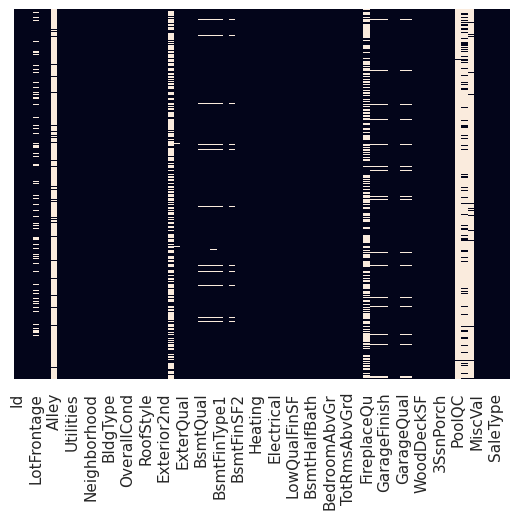

In [47]:
#non value with heatmap
sns.heatmap(dataset.isnull(), yticklabels=False, cbar=False)

In [48]:
test_dataset = pd.read_csv('test.csv')
test_dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


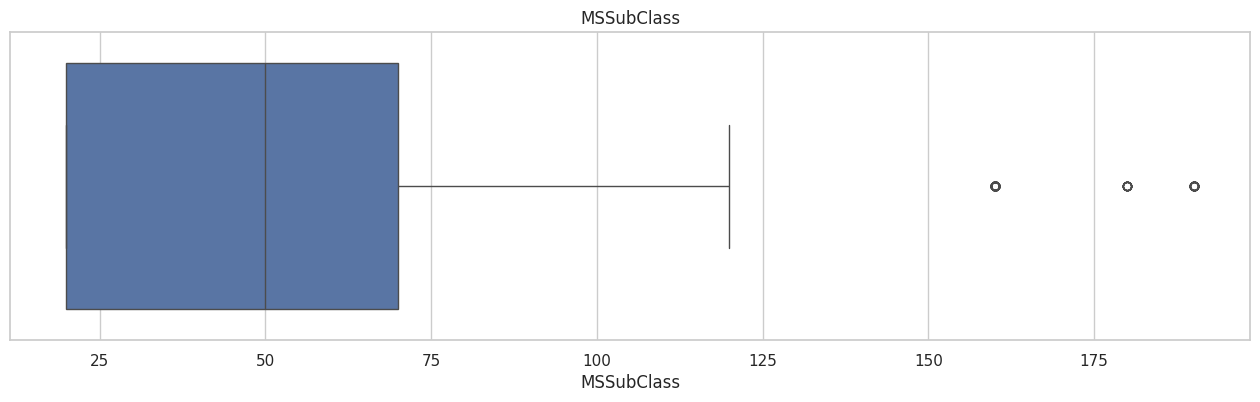

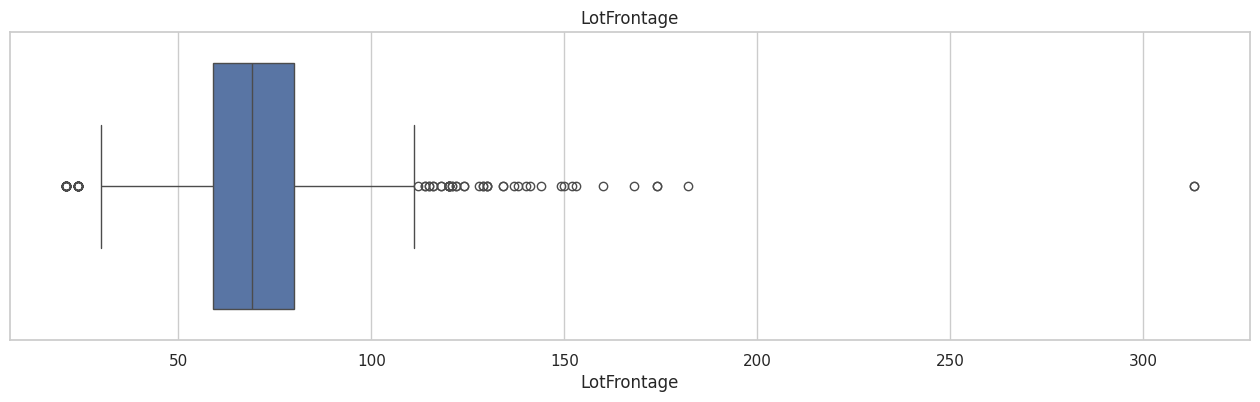

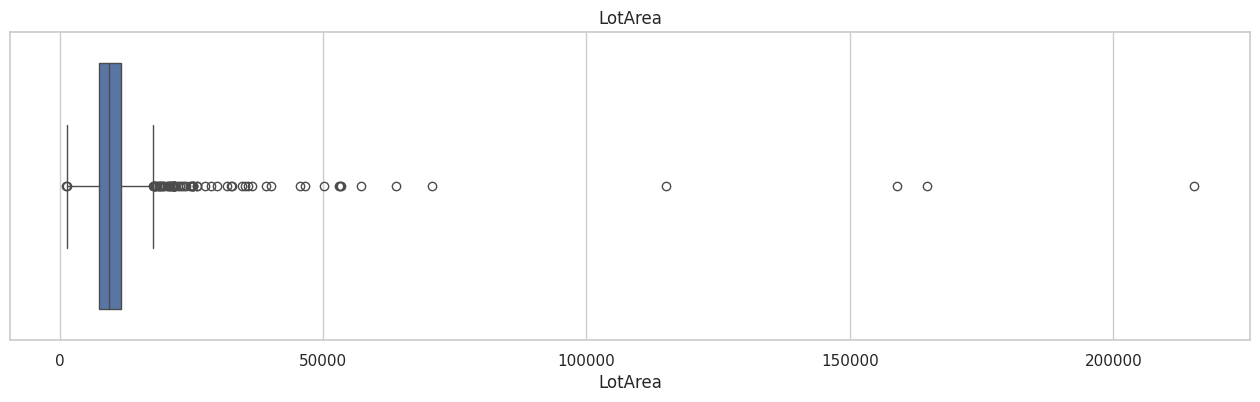

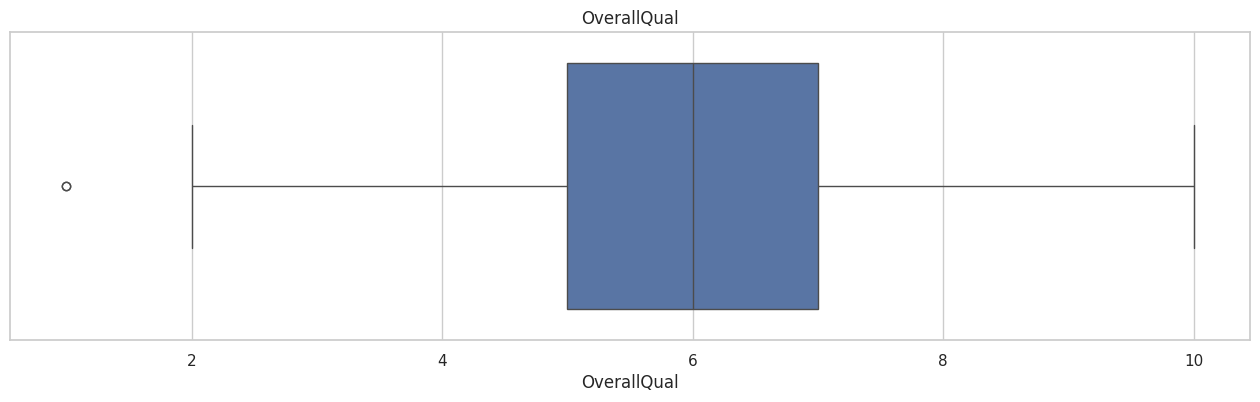

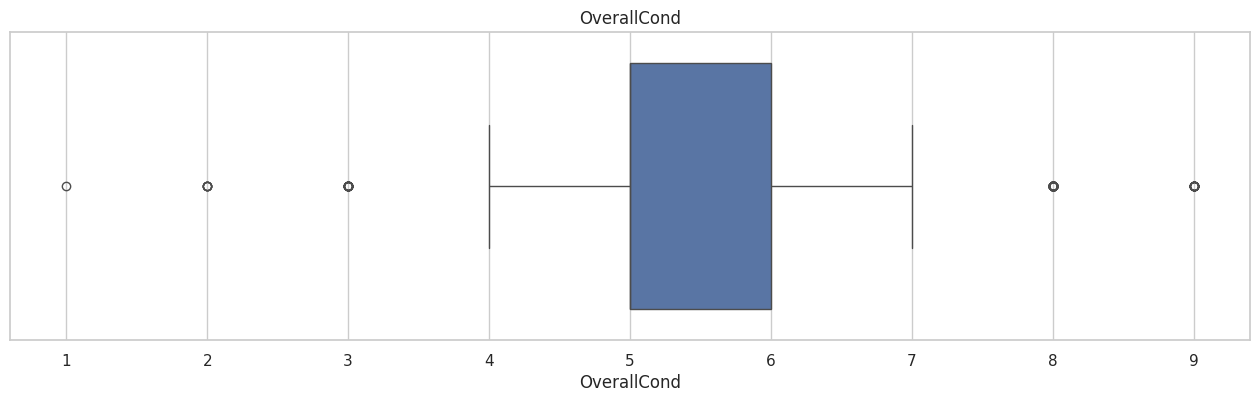

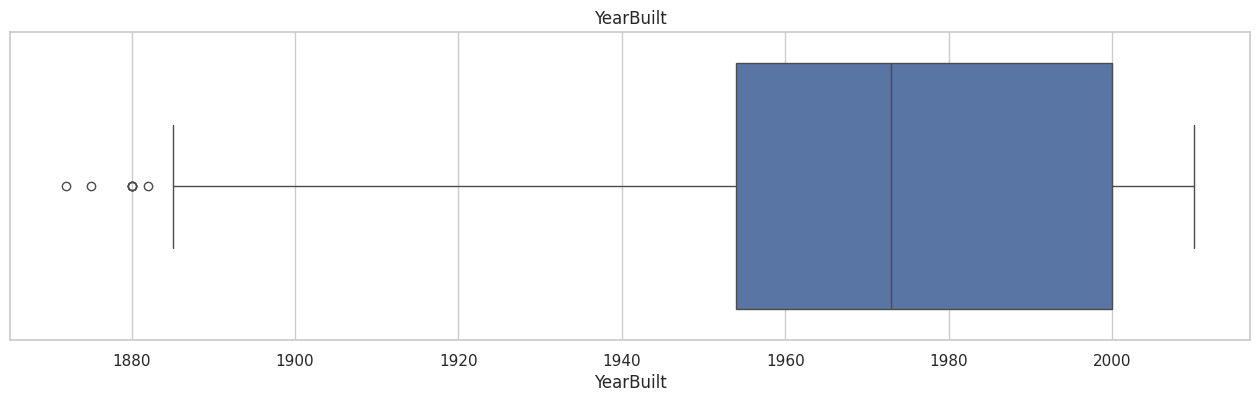

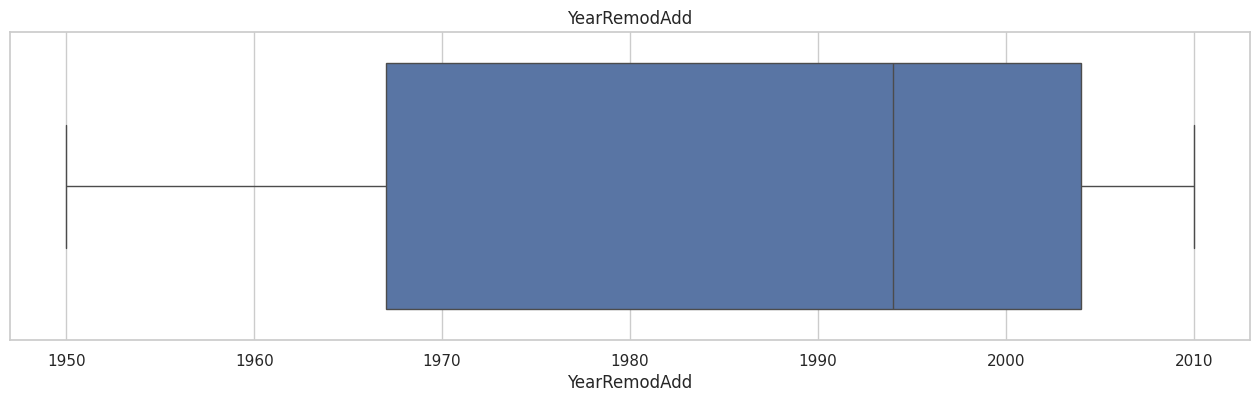

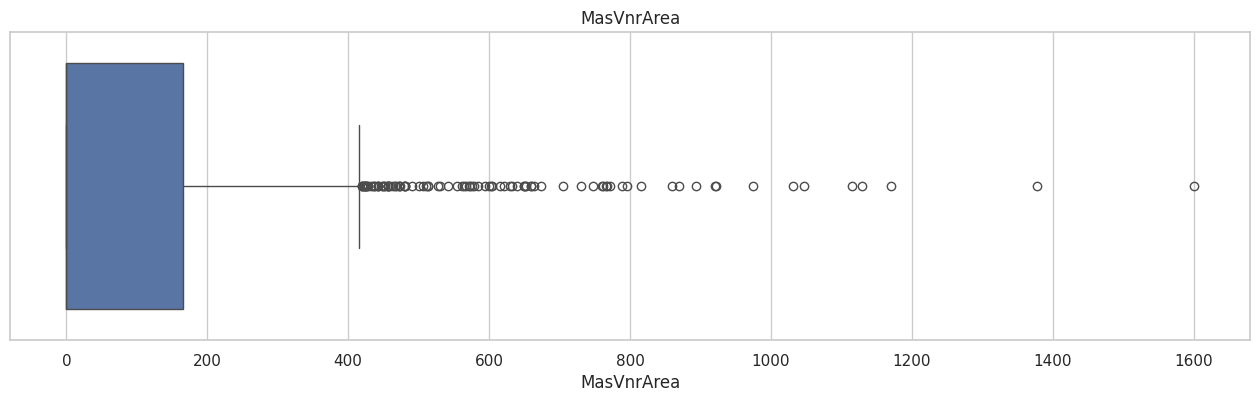

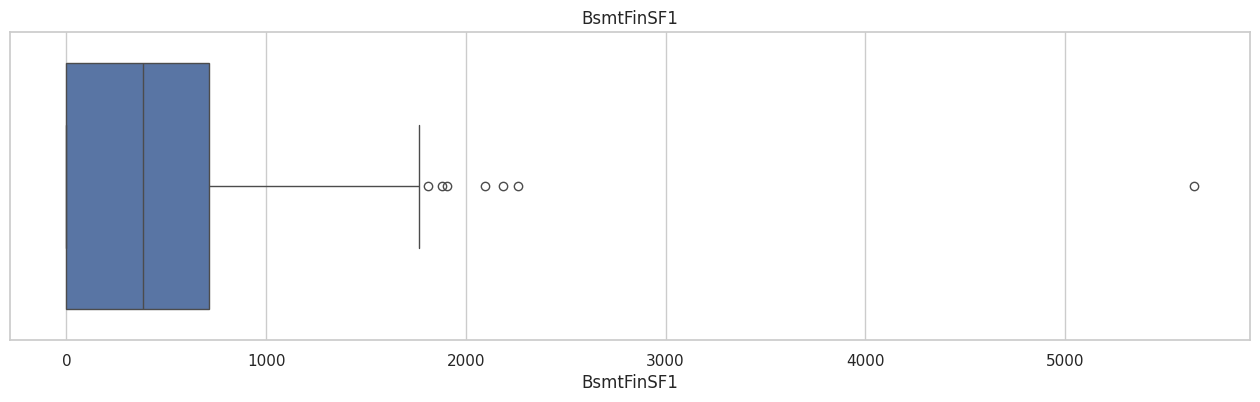

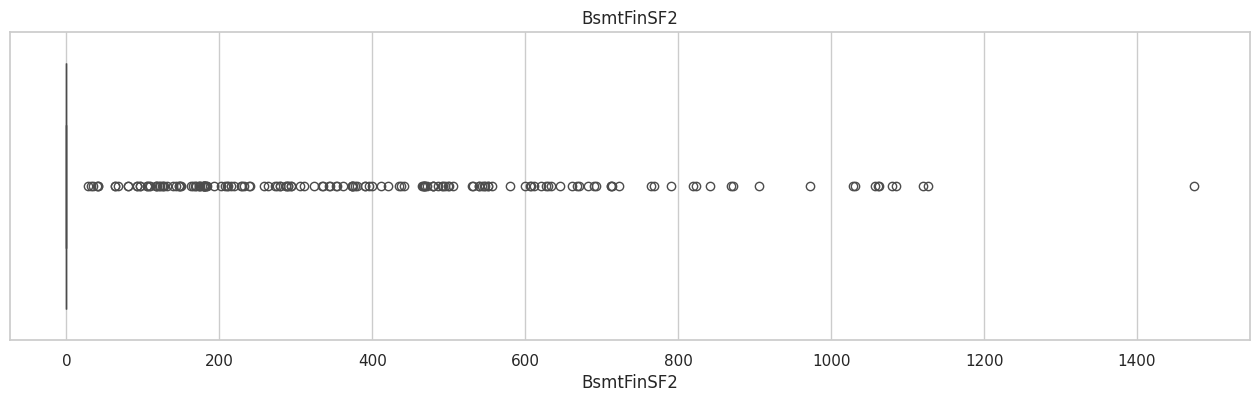

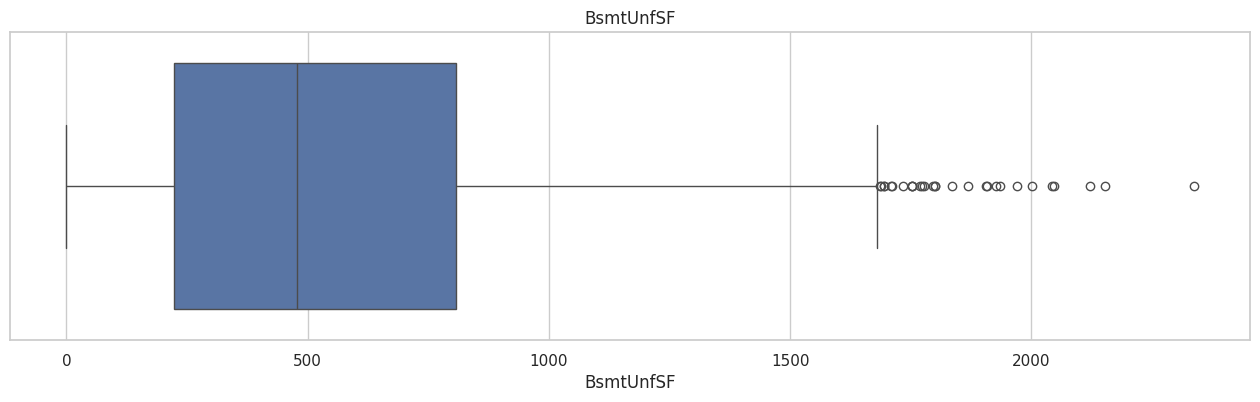

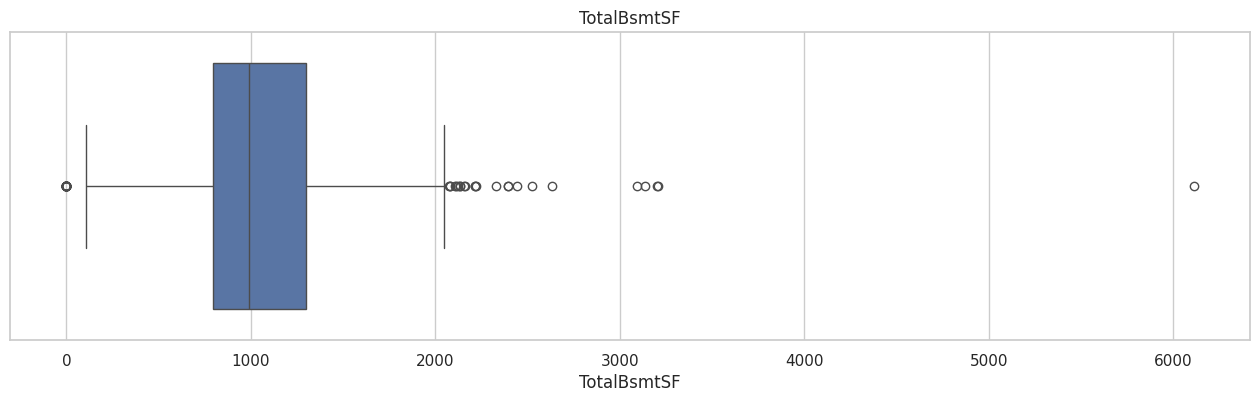

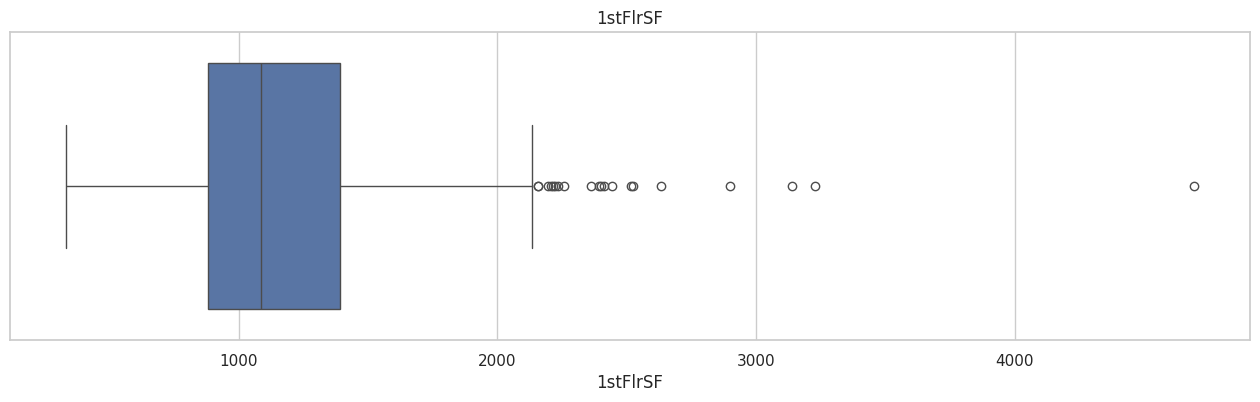

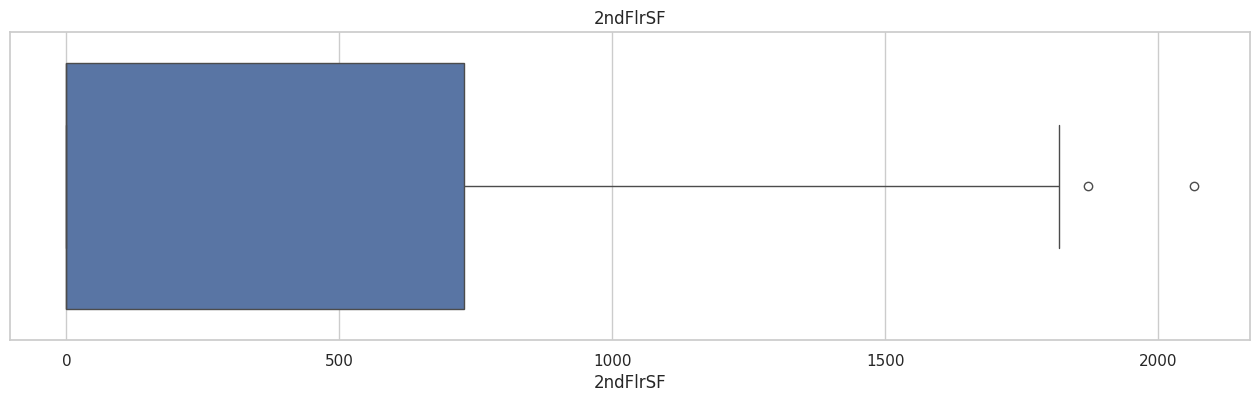

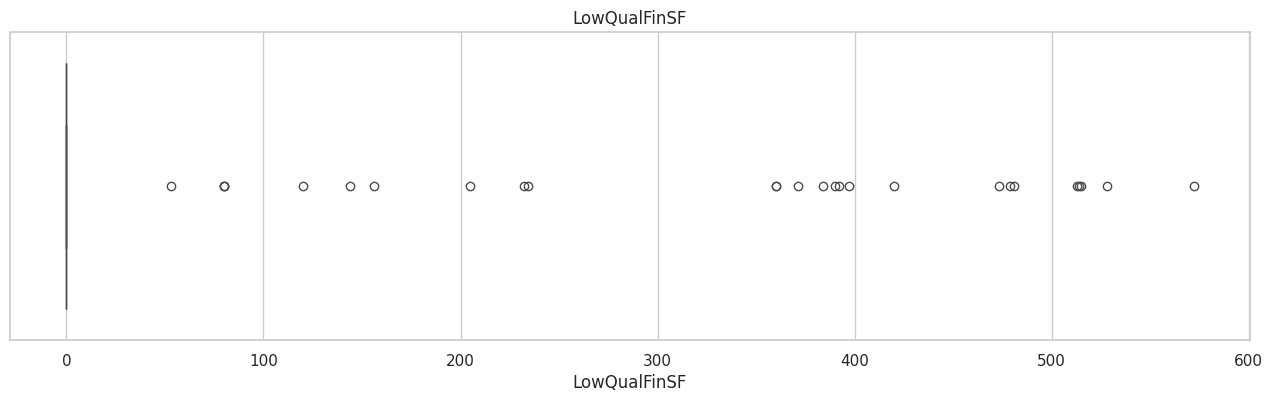

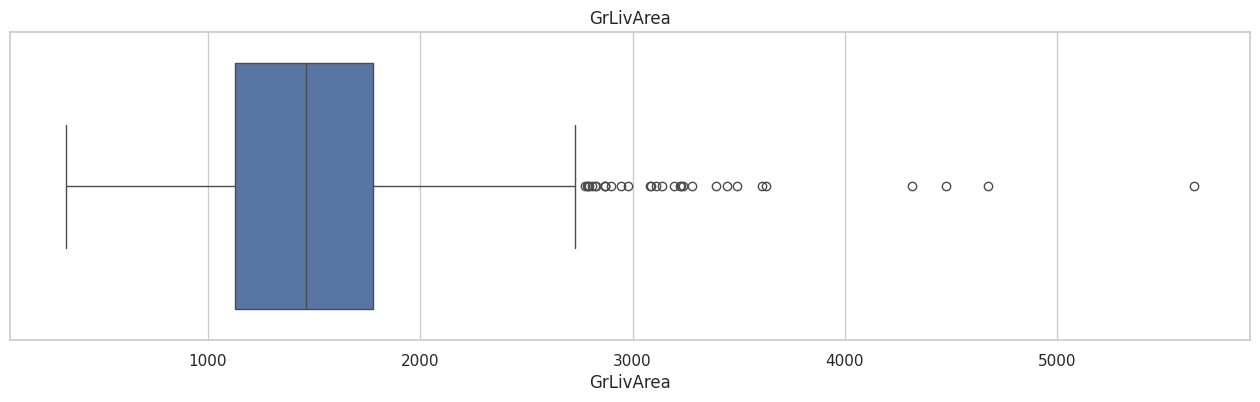

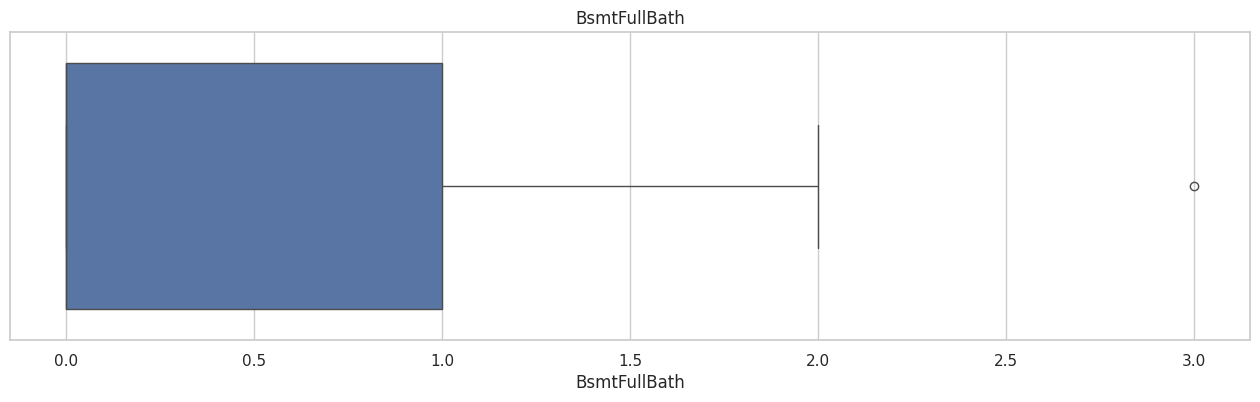

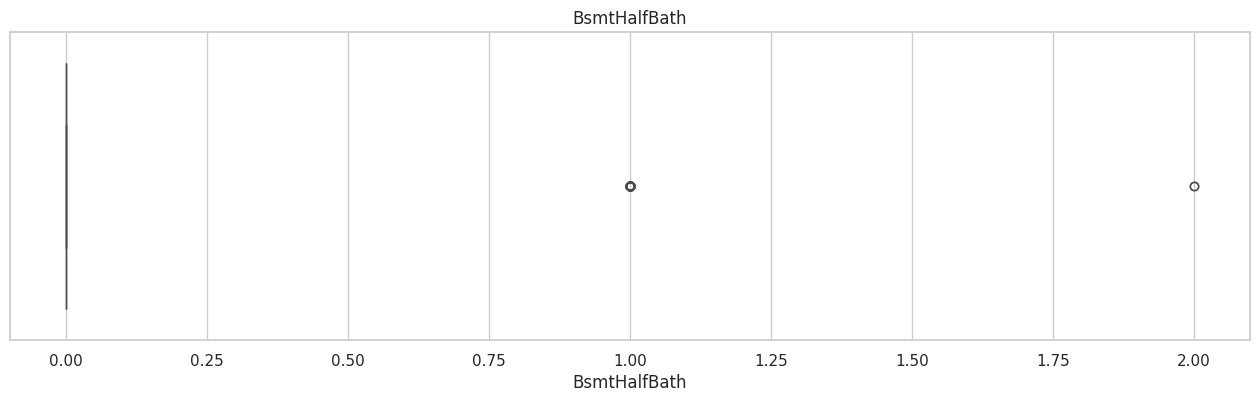

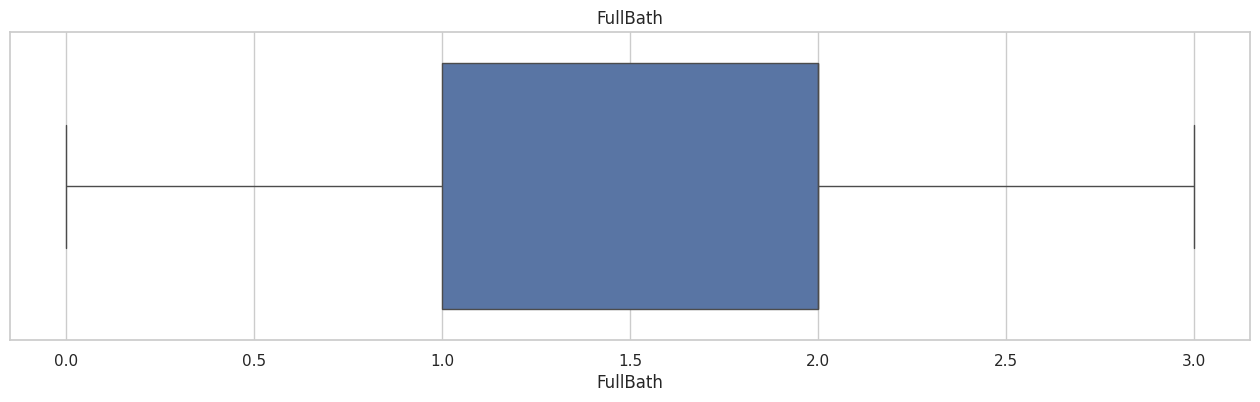

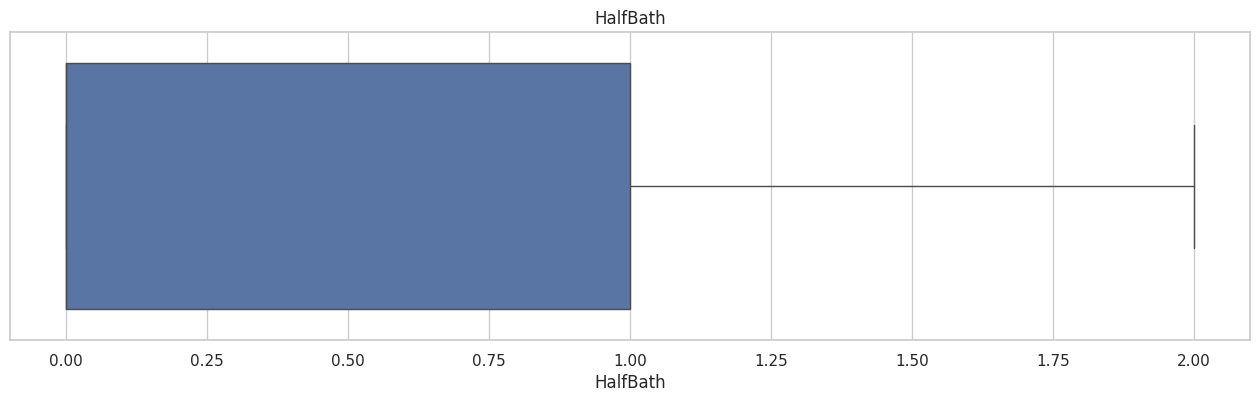

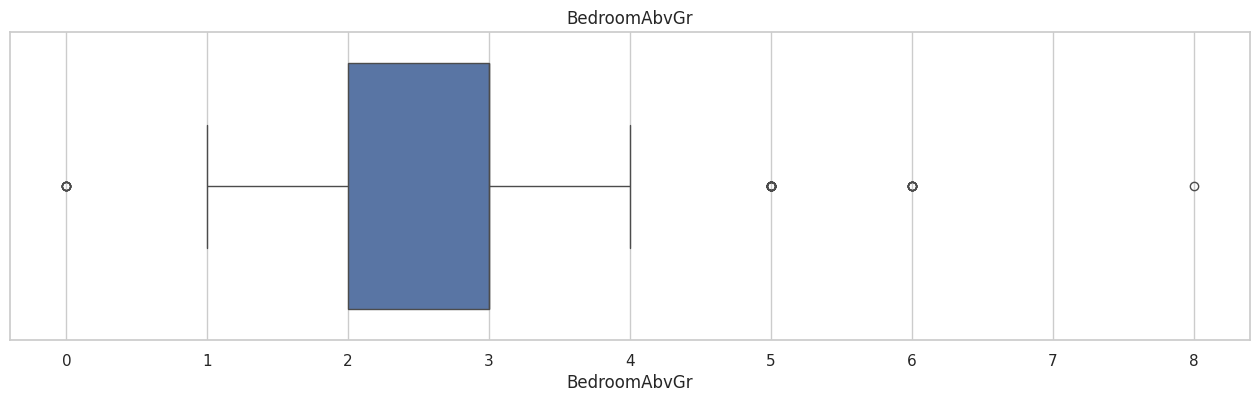

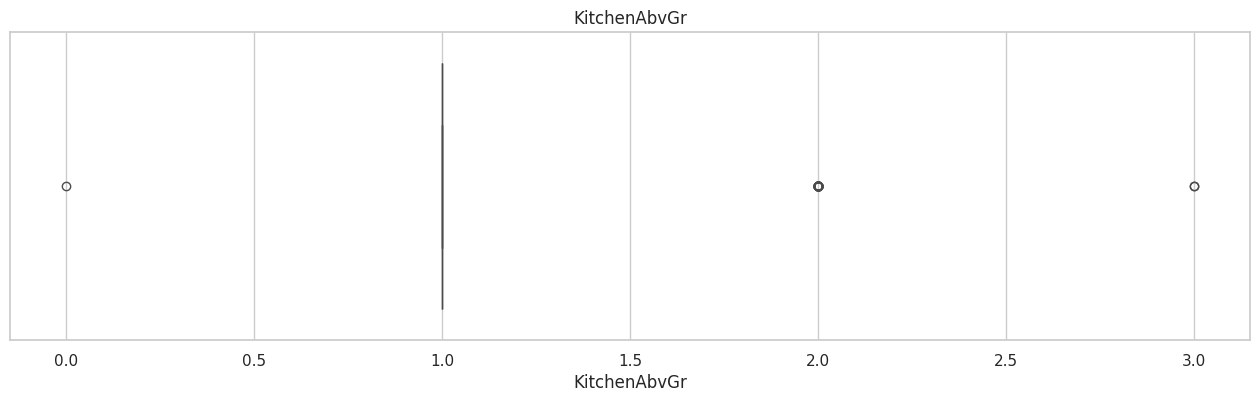

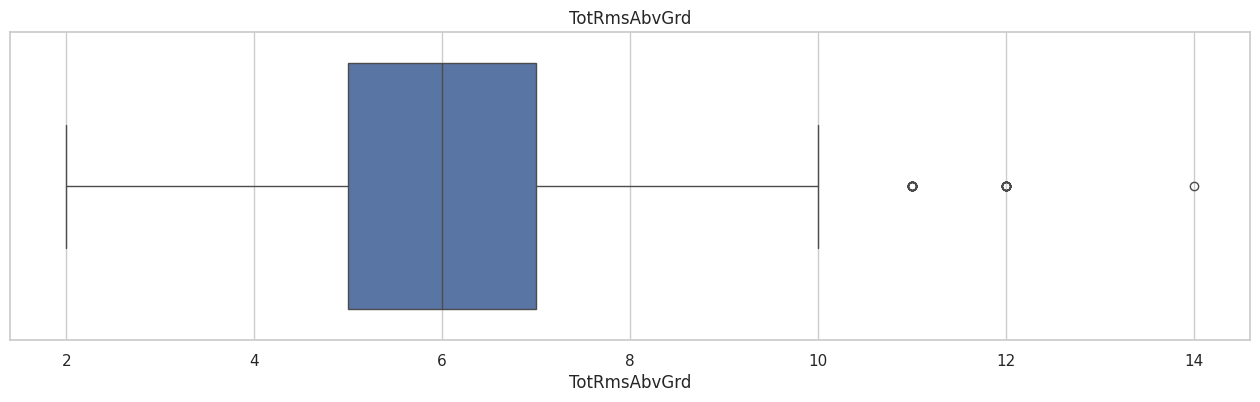

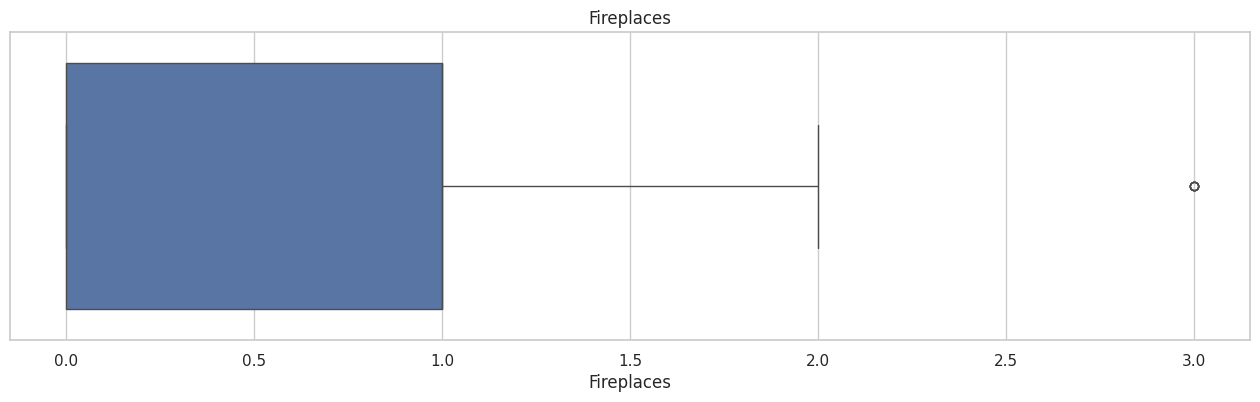

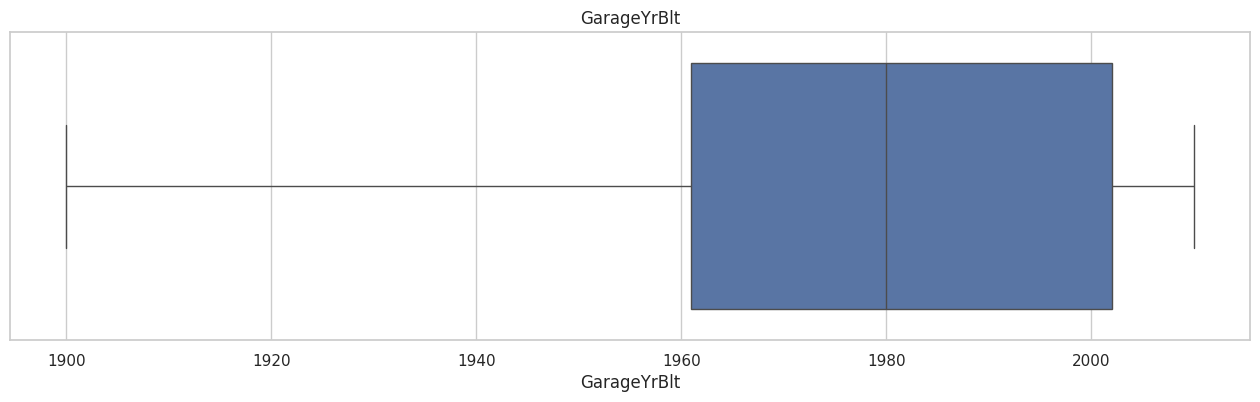

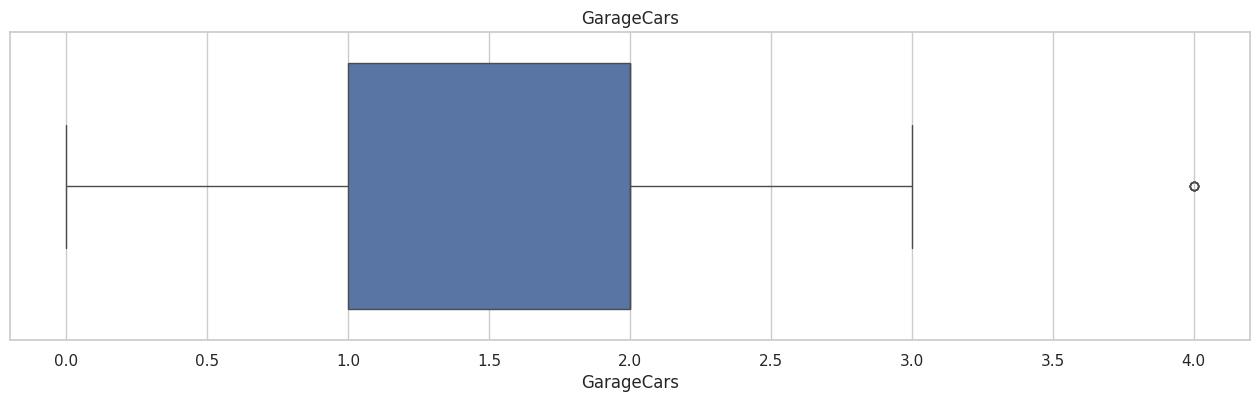

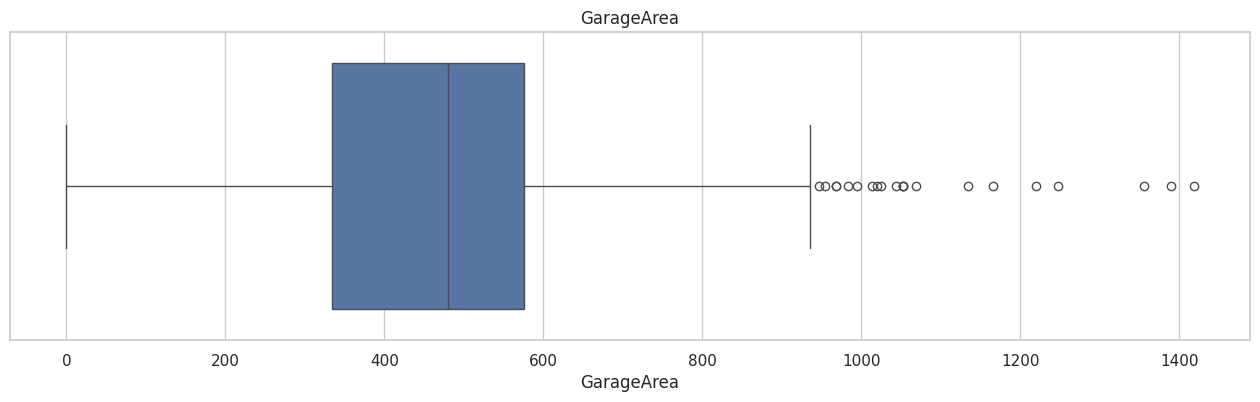

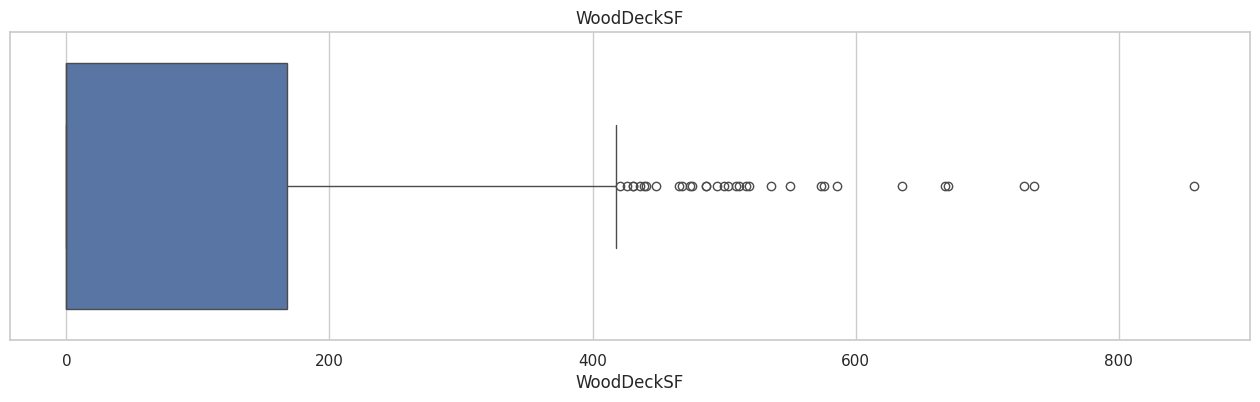

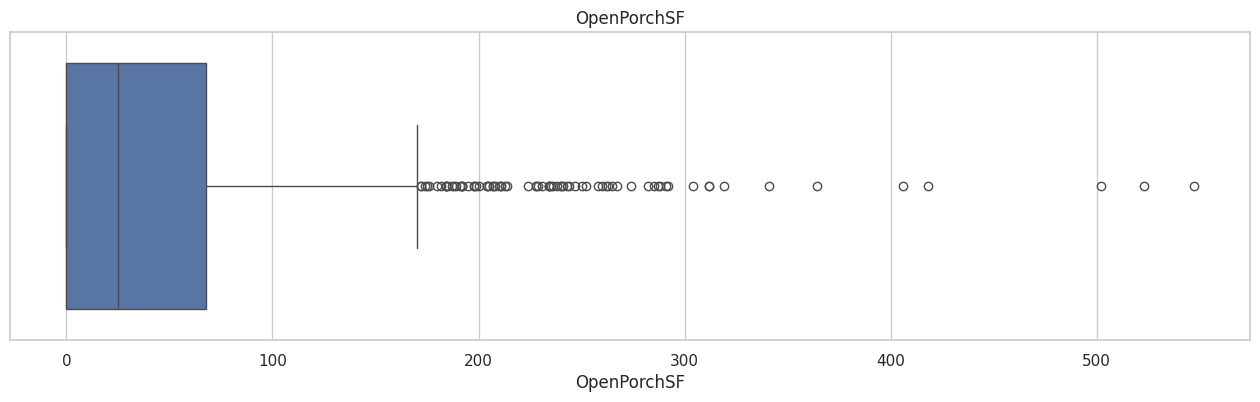

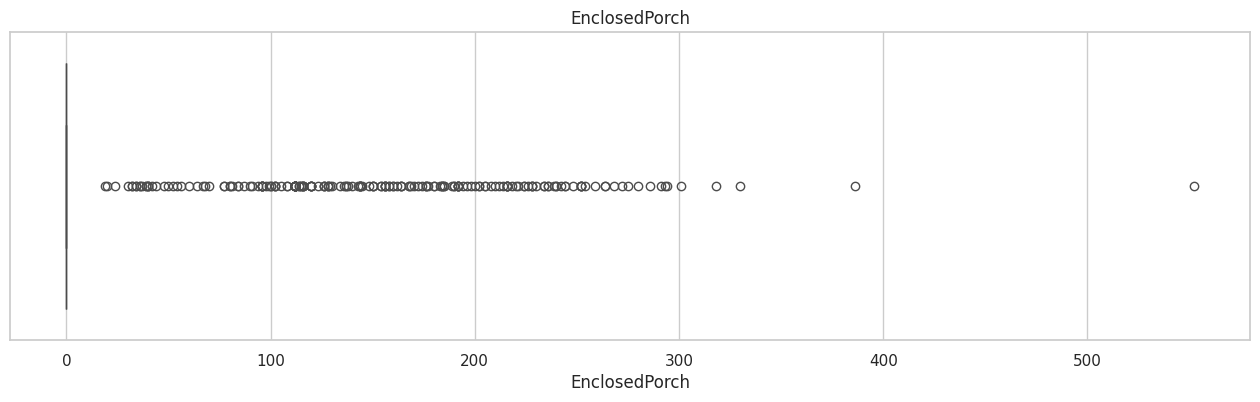

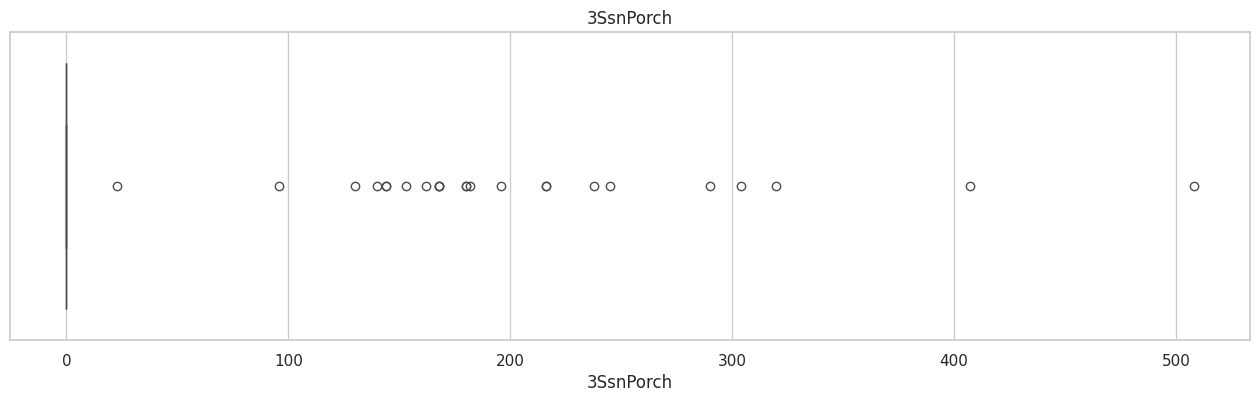

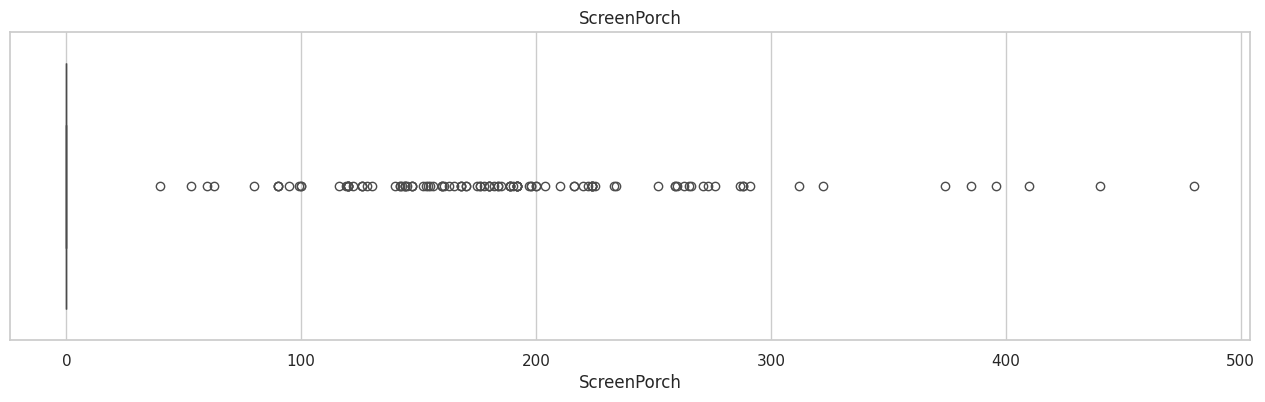

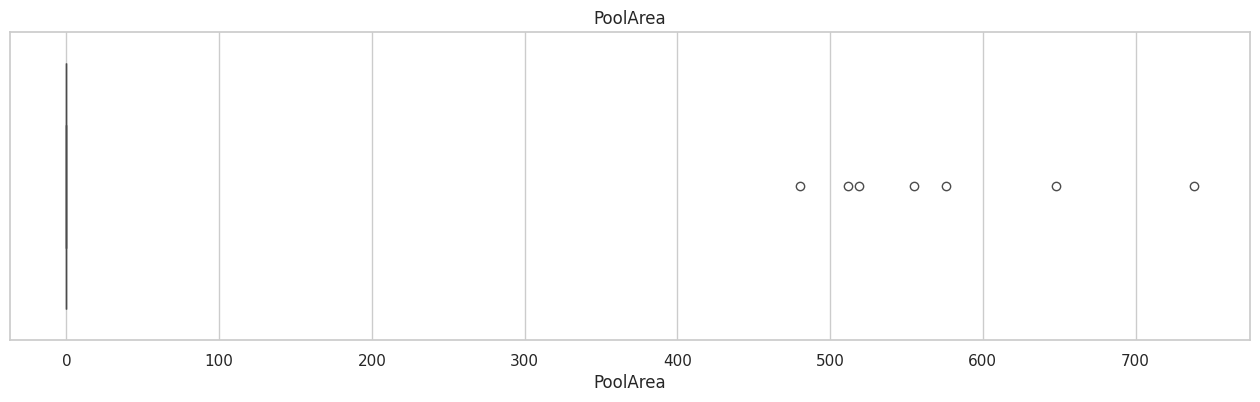

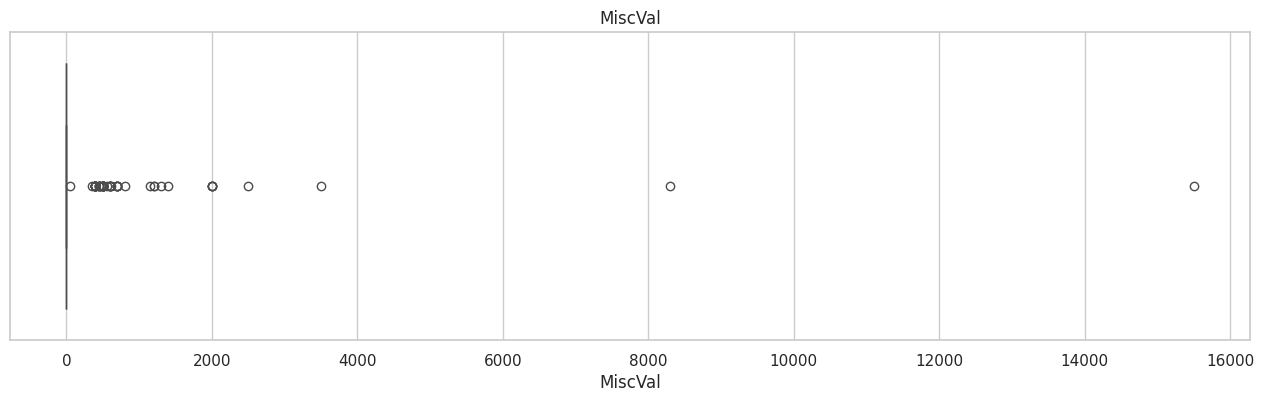

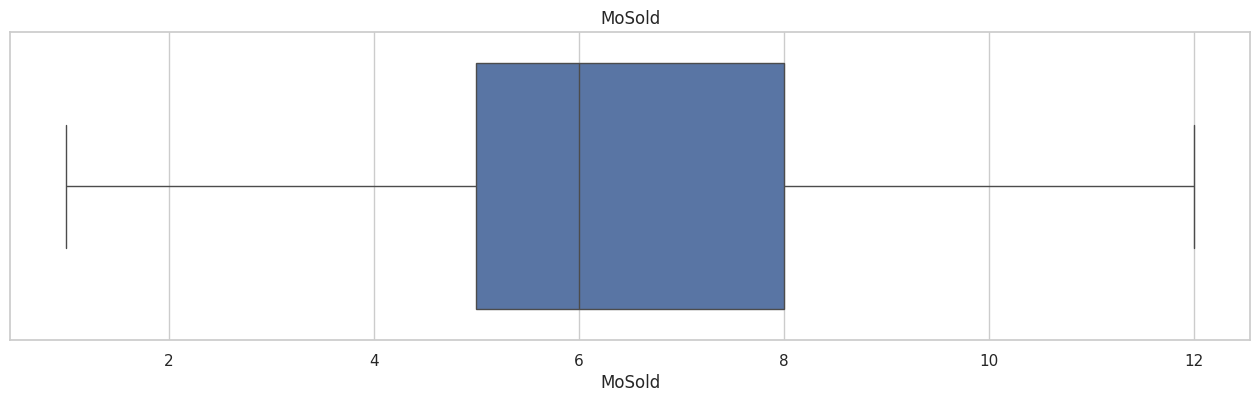

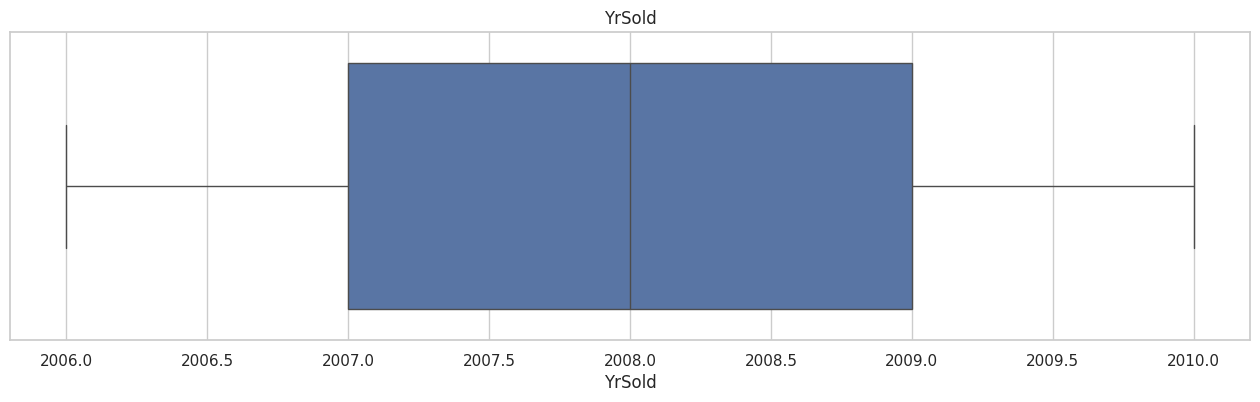

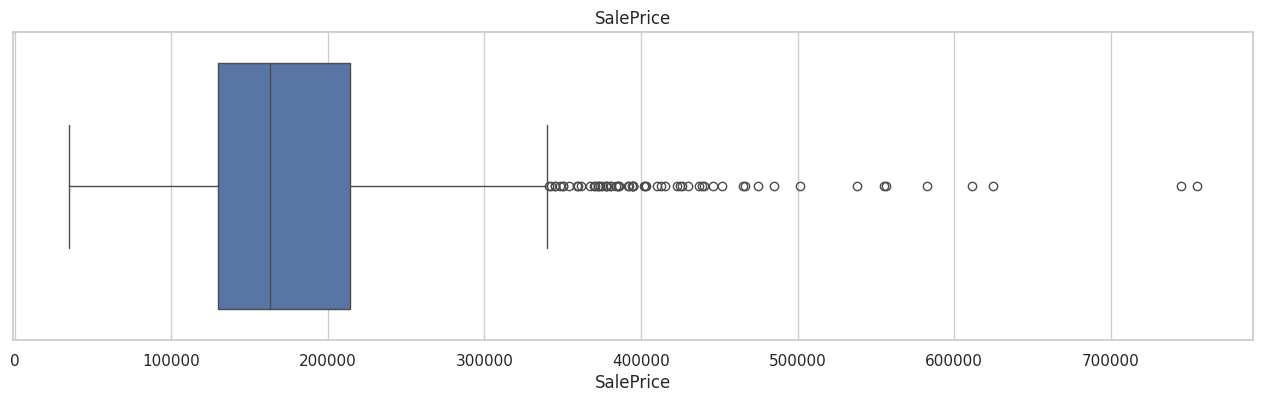

In [49]:
numerical_df = df_train.select_dtypes(exclude=['object'])
numerical_df = numerical_df.drop(['Id'], axis=1)
#
for column in numerical_df.columns:
    plt.figure(figsize=(16,4))
    sns.set_theme(style='whitegrid')
    sns.boxplot(numerical_df[column],orient='h')
    plt.title(column)
    plt.show()

In [50]:
#merge the datasets
df = pd.concat([df_train, test_dataset], axis=0)

In [51]:
#reset the index
df.reset_index(drop=True, inplace=True)

In [52]:
df.shape

(2919, 81)

In [53]:
#still find the missing rows
df.isnull().sum().sort_values(ascending=False)


,0
PoolQC,2909
MiscFeature,2814
Alley,2721
Fence,2348
MasVnrType,1766
...,...
EnclosedPorch,0
MoSold,0
MiscVal,0
YrSold,0


In [54]:
print(df['PoolQC'].unique())
print("")
print(df['PoolQC'].value_counts())

[nan 'Ex' 'Fa' 'Gd']

PoolQC
Ex    4
Gd    4
Fa    2
Name: count, dtype: int64


In [55]:
#fill the na
df['PoolQC'].fillna('None',inplace = True)

/tmp/ipython-input-1005657277.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['PoolQC'].fillna('None',inplace = True)


In [56]:
#change floats to int
df['BsmtFullBath'].fillna(0, inplace=True)
df['BsmtHalfBath'].fillna(0, inplace=True)
df['GarageYrBlt'].fillna(0, inplace=True)
df['GarageCars'].fillna(0, inplace=True)

df['BsmtFullBath'] = df['BsmtFullBath'].astype(int)
df['BsmtHalfBath'] = df['BsmtHalfBath'].astype(int)
df['GarageYrBlt'] = df['GarageYrBlt'].astype(int)
df['GarageCars'] = df['GarageCars'].astype(int)

/tmp/ipython-input-2175318166.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['BsmtFullBath'].fillna(0, inplace=True)
/tmp/ipython-input-2175318166.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'd

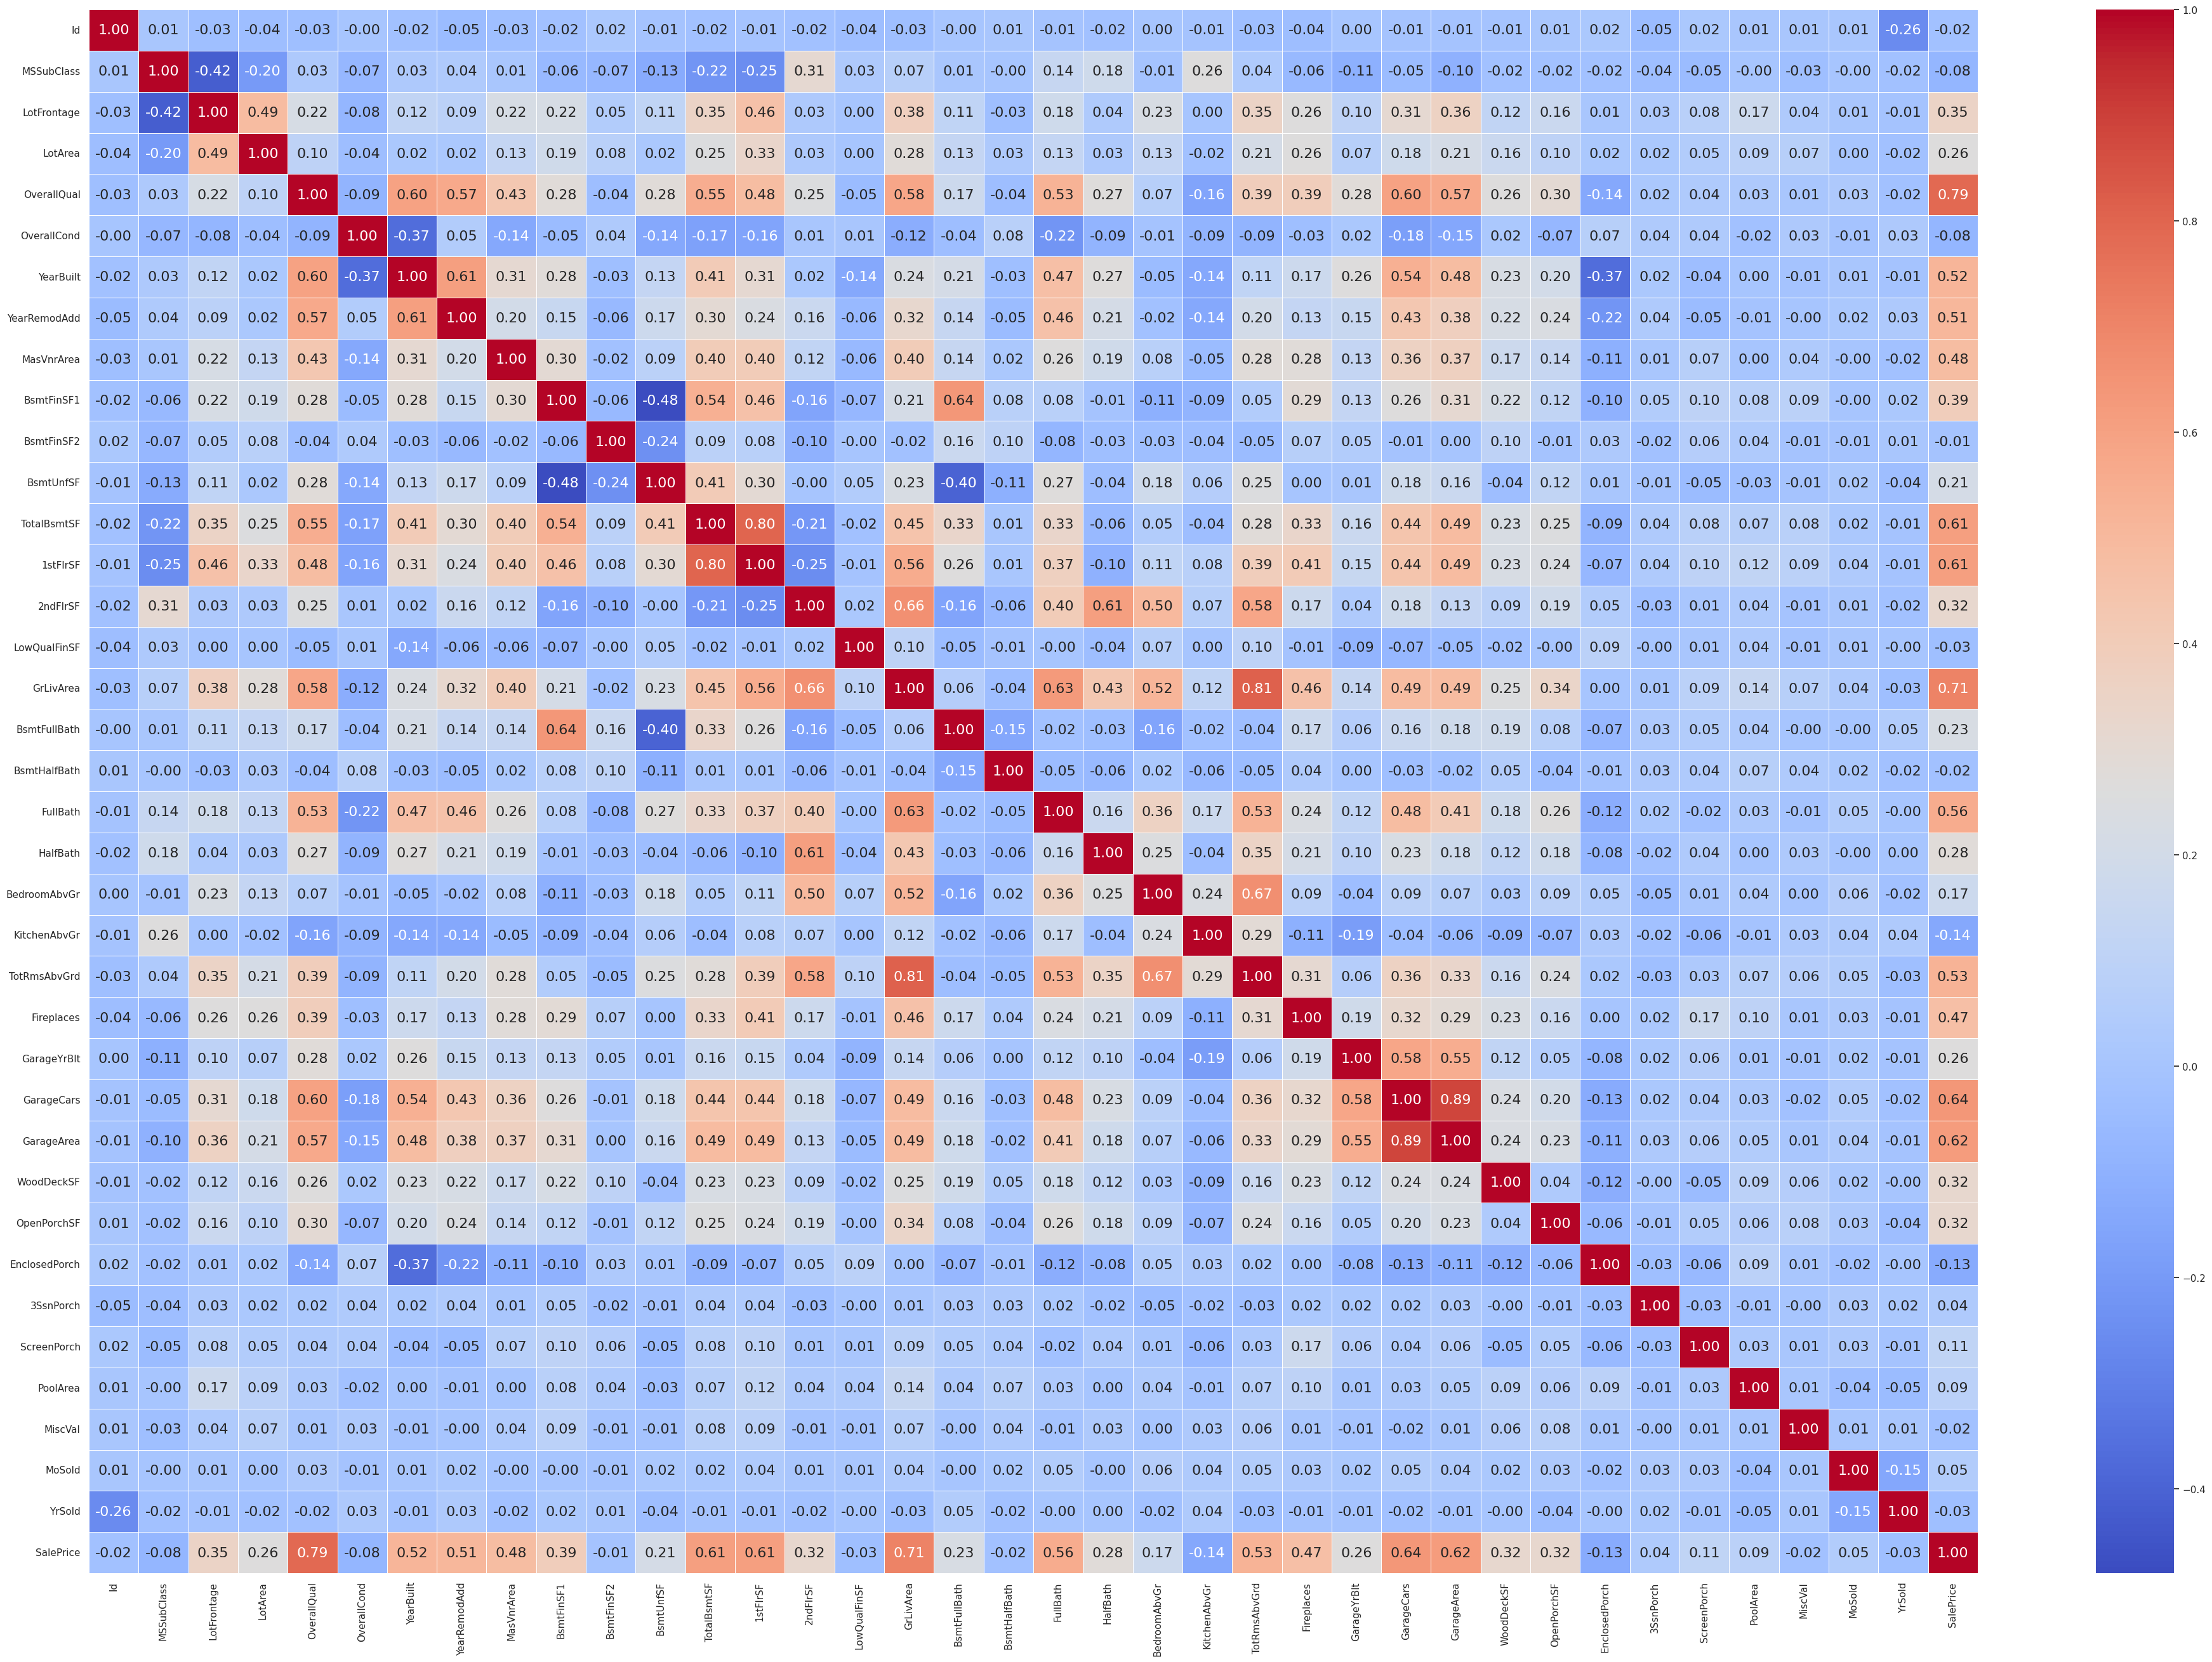

In [57]:
#feature engineering
#look up correlation between numeric features
#select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])
#calculate the correlation matrix
df_corr = numeric_df.corr().round(2)

#Create a heatmap
plt.figure(figsize=(48,32))
sns.heatmap(df_corr, annot=True, cmap='coolwarm',fmt='0.2f',linewidths=0.5,annot_kws={"size":16})
plt.show()

In [58]:
#features that have yrs in them
df['GarageYrBlt'] = df['YrSold'] - df['GarageYrBlt']
df['YearBuilt'] = df['YrSold'] - df['YearBuilt']
df['YearRemodAdd'] = df['YrSold'] - df['YearRemodAdd']
#then drop column
df.drop(['YrSold'], axis=1, inplace=True)


In [62]:
#features bathroom
df['TotalBaths'] = df['BsmtFullBath'] + 0.5*df['BsmtHalfBath'] + df['FullBath'] + 0.5*df['HalfBath']

df.drop(['FullBath'], axis=1, inplace=True)
df.drop(['HalfBath'], axis=1, inplace=True)
df.drop(['BsmtFullBath'], axis=1, inplace=True)
df.drop(['BsmtHalfBath'], axis=1, inplace=True)

In [59]:
#features about the gargage
df['GargageAreaPerCar'] = df['GarageArea'] / df['GarageCars']

#Fill in any nulls from feature engineering
df['GargageAreaPerCar'].fillna(0, inplace=True)
#
df.drop(['GarageArea'], axis=1 , inplace=True)
df.drop(['GarageCars'], axis=1 , inplace=True)
#

In [73]:
#create a list of the numerical
import scipy.stats as spicy
numerical_col = [cname for cname in df.columns if df[cname].dtype != 'object' and cname != 'SalePrice']
#create new df with numerical columns
skew_df = pd.DataFrame(numerical_col, columns= ['Future'])
#This finction
skew_df['Skew'] = skew_df['Future'].apply(lambda x: spicy.stats.skew(df[x]))
#Change skew to a positive number
skew_df['Absolute Skew'] = skew_df['Skew'].apply(abs)
#Create true/false coumns based on if Absolute Skew is >= 0.5
skew_df['Skewed'] = skew_df['Absolute Skew'].apply(lambda x: True if x >= 0.5 else False)
#

/tmp/ipython-input-3602067464.py:9: DeprecationWarning: Please import `skew` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  skew_values.append(spicy.stats.skew(df[col]))


In [74]:
#show the skew
skew_df

,Future,Skew,Absolute Skew,Skewed
0,Id,0.000000,0.000000,False
1,MSSubClass,1.375457,1.375457,True
2,LotFrontage,NaN,NaN,False
3,LotArea,12.822431,12.822431,True
4,OverallQual,0.197110,0.197110,False
5,OverallCond,0.570312,0.570312,True
6,YearBuilt,0.598609,0.598609,True
7,YearRemodAdd,0.450226,0.450226,False
8,MasVnrArea,NaN,NaN,False
9,BsmtFinSF1,NaN,NaN,False


In [75]:
#apply tranformation
for column in skew_df[skew_df['Skewed'] == True]['Future']:
    df[column] = np.log1p(df[column])

/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [72]:
df.head();

In [78]:
#label encode
ordinal_2 = ['LotShape','LandContour','LandSlope','BsmtExposure','BsmtFinType1','BsmtFinType2','Utilities','CentralAir','Functional',
            'GarageFinish','PavedDrive','Fence']

df['LotShape'] = df['LotShape'].map({'IR3':0,'IR2':1,'IR1':2,'Reg':3}).fillna(0).astype('int')
df['LandContour'] = df['LandContour'].map({'Low':0,'HLS':1,'Bnk':2,'Lvl':3}).fillna(0).astype('int')
df['LandSlope'] = df['LandSlope'].map({'Gtl':0,'Mod':1,'Sev':2}).fillna(0).astype('int')
df['BsmtExposure'] = df['BsmtExposure'].map({'None':0, 'No':1,'Mn':2,'Av':3,'Gd':4}).fillna(0).astype('int')
df['BsmtFinType1'] = df['BsmtFinType1'].map({'None':0 ,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6}).fillna(0).astype('int')
df['BsmtFinType2'] = df['BsmtFinType2'].map({'None':0 ,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6}).fillna(0).astype('int')
df['Utilities'] = df['Utilities'].map({'ELO':0,'NoSeWa':1,'NoSewr':2,'AllPub':3}).fillna(0).astype('int')
df['CentralAir'] = df['CentralAir'].map({'N':0,'Y':1}).fillna(0).astype('int')
df['Functional'] = df['Functional'].map({'Sal':0,'Sev':1,'Maj2':2,'Maj1':3,'Mod':4,'Min2':5,'Min1':6,'Typ':7}).fillna(0).astype('int')
#
df['GarageFinish'] = df['GarageFinish'].map({'None':0,'Unf':1,'RFn':2,'Fin':3}).fillna(0).astype('int')
df['PavedDrive'] = df['PavedDrive'].map({'N':0,'P':1,'Y':2}).fillna(0).astype('int')
df['Fence'] = df['Fence'].map({'None':0, 'MnWw':1, 'GdWo':2, 'MnPrv':3, 'GdPrv':4}).fillna(0).astype('int')
df['FireplaceQu'] = df['FireplaceQu'].map({'None':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}).fillna(0).astype('int')
df['GarageQual'] = df['GarageQual'].map({'None':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}).fillna(0).astype('int')
df['GarageCond'] = df['GarageCond'].map({'None':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}).fillna(0).astype('int')
df['PoolQC'] = df['PoolQC'].map({'None':0, 'Fa':1, 'Gd':2, 'Ex':3}).fillna(0).astype('int')

In [ ]:
#get remaining non-ordinal categorical columns
df_categorical = df_categorical.drop(columns=ordinal_1)
df_categorical = df_categorical.drop(columns=ordinal_2)
#get the rest of categorical
ohe_ = df_categorical.columns.tolist()

#convert
df_encoded = pd.get_dummies(df[ohe_], drop_first=True)

In [79]:
#splitting data back into train and test set
df_train = df.iloc[:df_train.shape[0]]
df_test = df.iloc[df_train.shape[0]:]
#
df_train.drop(['Id'], axis =1, inplace = True)
df_test.drop(['SalePrice','Id'], axis = 1, inplace =True)

/tmp/ipython-input-4207410241.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['Id'], axis =1, inplace = True)
/tmp/ipython-input-4207410241.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test.drop(['SalePrice','Id'], axis = 1, inplace =True)


In [61]:
log_target = np.log()

In [ ]:
#use best parameters to train
catboost_model = catboost_model
xgb_model = XGBRe